# **Clustering Project**

This notebook mainly consists of the following algorithms with basic explanation on the countries dataset. the algorithms discussed here are :-
1. **KMeans**
2. **Mini Batch KMeans**
3. **Mean Shift Algorithm**
4. **Affinity Propagation**

We are using here the countries dataset for analysis which can be easily found in kaggle.

### **Importing The Necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### **Loading The Dataset**


In [2]:
data=pd.read_csv("/home/nilotpal/Desktop/Small projects/Clustering_Project/Data/Country-data.csv")

In [3]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Here we will be considering the health aspect of the countries . thus we will be mainly focussing on the **Life Expectancy** and **Total Fertility**. 

In [54]:
df=data.iloc[:,[0,7,8]]
df

,country,life_expec,total_fer
0,Afghanistan,56.2,5.82
1,Albania,76.3,1.65
2,Algeria,76.5,2.89
3,Angola,60.1,6.16
4,Antigua and Barbuda,76.8,2.13
...,...,...,...
162,Vanuatu,63.0,3.50
163,Venezuela,75.4,2.47
164,Vietnam,73.1,1.95
165,Yemen,67.5,4.67


### **Dataset Description**

The data has been used to categorise the countries using basic socio economic and health factors that determine the overall development of the country.

- **country**:Name of the country
- **child mortality**: Death of children under 5 years of age per 1000 live births
- **exports** : Exports of goods and services per capita. Given as %age of the GDP per capita
- **health**: Total health spending per capita. Given as %age of GDP per capita imports
- **imports**: Imports of goods and services per capita. Given as %age of the GDP per capita
- **income**:Net income per person
- **inflation**: The measurement of the annual growth rate of the Total GDP life_expec

- **life expectancy**:life expectancy of the different countries .
- **total_fertility rate**: The number of children that would be born to each woman if the current age-fertility rates remain th...
- **gdpp**:The GDP per capita. Calculated as the Total GDP divided by the total population.

### **Clustering Method**

We will basically use here the k means clustering method for our clustering problem analysis. 

### **K-Means Clustering**

K Means is an algorithm for unsupervised clustering: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm. It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

### **Visualisation Of The Dataset**

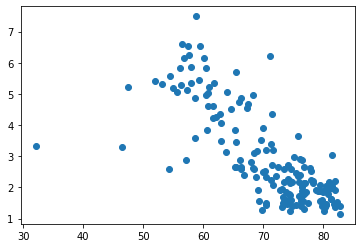

In [16]:
plt.scatter(data["life_expec"],data["total_fer"])

### **K-Means Elbow method**

The Elbow method is a very popular technique and **the idea is to run k-means clustering for a range of clusters k and for each value, we are calculating the sum of squared distances from each point to its assigned center**(distortions).

Here, we would be considering the range of data from say **1 to 10**.

In [57]:
distortions=[]
K=range(1,10)
for i in K:
    kmeanModel=KMeans(n_clusters=i)
    kmeanModel.fit(df.iloc[:,[1,2]])
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'Optimal Value Of K')

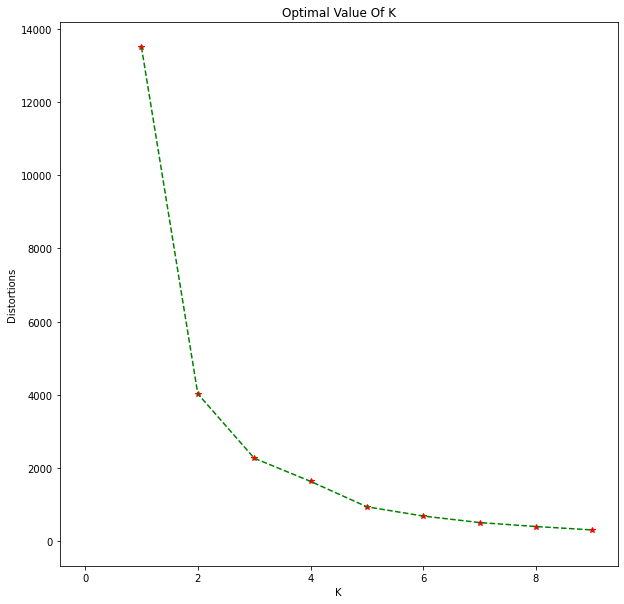

In [58]:
plt.figure(figsize=(10,10))
plt.plot(K,distortions,"r*",50)
plt.plot(K,distortions,"g--",2)
plt.xlabel('K')
plt.ylabel('Distortions')
plt.title("Optimal Value Of K")

Thus, from the above elbow plot we can infer the ptimal number of clusters.

### **KMeans Clustering**

In [17]:
from sklearn.cluster import KMeans

In [82]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
t0=time.time()
est.fit(df.iloc[:,[1,2]])
t_K_Means=time.time()-t0
t_K_Means

0.07383203506469727

Text(0.5, 1.0, 'KMeans Clustering Of Countries')

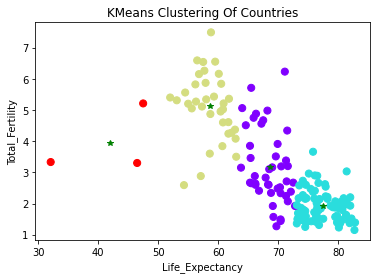

In [149]:
y_kmeans = est.predict(df.iloc[:,[1,2]])
plt.figure()
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=y_kmeans, s=50, cmap='rainbow')
for i in range(len(est.cluster_centers_)):
    x=est.cluster_centers_[i][0]
    y=est.cluster_centers_[i][1]
    plt.plot(x,y,"g*")
plt.xlabel('Life_Expectancy')
plt.ylabel('Total_Fertility')
plt.title("KMeans Clustering Of Countries")

### **Mini-Batch KMeans Algorithm**

The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution.

In [61]:
import time

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [79]:
mbk=MiniBatchKMeans(n_clusters=4,batch_size=25,
                   n_init=10,max_no_improvement=10)
t0=time.time()
mbk.fit(df.iloc[:,[1,2]])
t_mini_batch=time.time()-t0
t_mini_batch

0.08474230766296387

Text(0.5, 1.0, 'Mini Batch KMeans Clustering Of Countries')

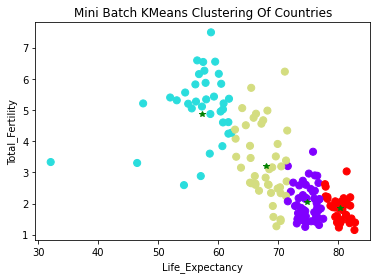

In [135]:
y_mimibatch_kmeans = mbk.predict(df.iloc[:,[1,2]])
plt.figure()
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=y_mimibatch_kmeans, s=50, cmap='rainbow')
for i in range(len(mbk.cluster_centers_)):
    x=mbk.cluster_centers_[i][0]
    y=mbk.cluster_centers_[i][1]
    plt.plot(x,y,"g*")
plt.xlabel('Life_Expectancy')
plt.ylabel('Total_Fertility')
plt.title("Mini Batch KMeans Clustering Of Countries")

### **Mean Shift Algorithm**

MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

In [99]:
from sklearn.cluster import MeanShift,estimate_bandwidth

In [100]:
bandwidth=estimate_bandwidth(df.iloc[:,[1,2]],quantile=0.2, n_samples=500)

In [101]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 5


Text(0.5, 1.0, 'MeanShift Clustering Of Countries')

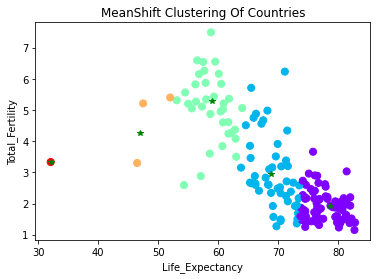

In [134]:
y_mean_shift=ms.predict(df.iloc[:,[1,2]])
plt.figure()
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=y_mean_shift, s=50, cmap='rainbow')
for i in range(len(ms.cluster_centers_)):
    x=ms.cluster_centers_[i][0]
    y=ms.cluster_centers_[i][1]
    plt.plot(x,y,"g*")
plt.xlabel('Life_Expectancy')
plt.ylabel('Total_Fertility')
plt.title("MeanShift Clustering Of Countries")

### **Affinity Propagation**

**Affinity Propagation** creates clusters by sending messages between pairs of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. The messages sent between pairs represent the suitability for one sample to be the exemplar of the other, which is updated in response to the values from other pairs. This updating happens iteratively until convergence, at which point the final exemplars are chosen, and hence the final clustering is given.

In [136]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [137]:
af = AffinityPropagation(preference=-50).fit(df.iloc[:,[1,2]])
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

/home/nilotpal/.local/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


Text(0.5, 1.0, 'MeanShift Clustering Of Countries')

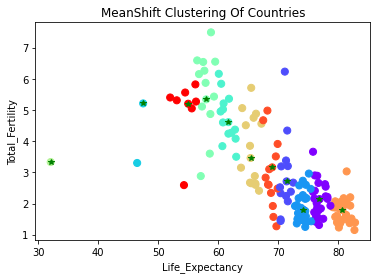

In [140]:
y_af=af.predict(df.iloc[:,[1,2]])
plt.figure()
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=y_af, s=50, cmap='rainbow')
for i in range(len(af.cluster_centers_)):
    x=af.cluster_centers_[i][0]
    y=af.cluster_centers_[i][1]
    plt.plot(x,y,"g*")
plt.xlabel('Life_Expectancy')
plt.ylabel('Total_Fertility')
plt.title(" Clustering Of Countries")